In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os


# Random split

In [13]:
folder = "outputs/random_split_fprint/sqCos_noBN_metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_0.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [14]:
metrics = []
for seed in range(10):
    with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
        m = json.load(f)
        metrics_names = list(m.keys())
        m["seed"] = seed
        metrics.append(m)
metrics_df = pd.DataFrame(metrics)        
metrics_df    

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,seed
0,0.314532,0.452210,0.662571,0.469797,0.643116,0.754557,0.347755,0
1,0.288966,0.486951,0.659007,0.468696,0.715728,0.880895,0.327350,1
2,0.328970,0.412633,0.639632,0.417498,0.600008,0.754990,0.299406,2
3,0.318973,0.483677,0.700761,0.532505,0.609115,0.693007,0.441489,3
4,0.370761,0.332735,0.649239,0.419843,0.538496,0.493944,0.375074,4
5,0.313777,0.463367,0.678107,0.498278,0.643925,0.720523,0.387371,5
6,0.305674,0.461021,0.664996,0.474636,0.654884,0.770181,0.351022,6
7,0.312415,0.428433,0.663069,0.464750,0.635428,0.686036,0.358723,7
8,0.316193,0.464370,0.660061,0.466535,0.634886,0.803527,0.336771,8
9,0.354720,0.384360,0.667246,0.458960,0.543737,0.559964,0.398329,9


In [15]:
metrics_long_table = pd.melt(metrics_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table

,seed,variable,value
0,0,test_loss,0.314532
1,1,test_loss,0.288966
2,2,test_loss,0.328970
3,3,test_loss,0.318973
4,4,test_loss,0.370761
...,...,...,...
65,5,test_recall,0.387371
66,6,test_recall,0.351022
67,7,test_recall,0.358723
68,8,test_recall,0.336771


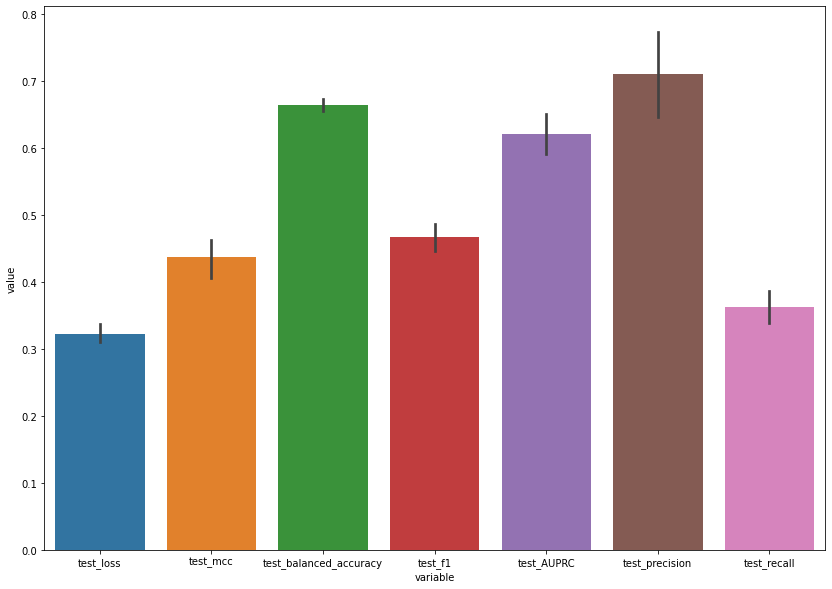

In [16]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=metrics_long_table, x="variable", y="value", ax=ax)
plt.show()

# Partitioned 

In [17]:
folder = "outputs/partitioned/sqCos_noleak_metrics"
os.listdir(folder)

['test_metrics_8.json',
 'test_metrics_4.json',
 'test_metrics_1.json',
 'test_metrics_2.json',
 'test_metrics_0.json',
 'test_metrics_6.json',
 'test_metrics_7.json',
 'test_metrics_5.json',
 'test_metrics_9.json',
 'test_metrics_3.json']

In [18]:
metrics = []
for seed in range(10):
    with open(os.path.join(folder, "test_metrics_{}.json".format(seed)), "r") as f:
        m = json.load(f)
        metrics_names = list(m.keys())
        m["seed"] = seed
        metrics.append(m)
metrics_df = pd.DataFrame(metrics)     
metrics_long_table = pd.melt(metrics_df, id_vars="seed", value_vars=metrics_names)
metrics_long_table
metrics_df    

,test_loss,test_mcc,test_balanced_accuracy,test_f1,test_AUPRC,test_precision,test_recall,seed
0,0.395772,0.388021,0.634115,0.402931,0.582982,0.732875,0.290364,0
1,0.468813,0.279295,0.573469,0.249691,0.504079,0.744935,0.158683,1
2,0.411539,0.375285,0.652419,0.427237,0.569753,0.631141,0.354336,2
3,0.440945,0.334142,0.633241,0.397753,0.545145,0.594656,0.347095,3
4,0.507599,0.000000,0.500000,0.000000,0.338922,0.000000,0.000000,4
5,0.437470,0.434784,0.655297,0.450080,0.597242,0.774374,0.331106,5
6,0.464546,0.289402,0.581682,0.278482,0.517725,0.721267,0.183311,6
7,0.491876,0.375647,0.627924,0.387402,0.573661,0.748669,0.282296,7
8,0.391321,0.471152,0.682450,0.500348,0.614277,0.760987,0.394740,8
9,0.437465,0.427272,0.637553,0.417924,0.605844,0.842179,0.289789,9


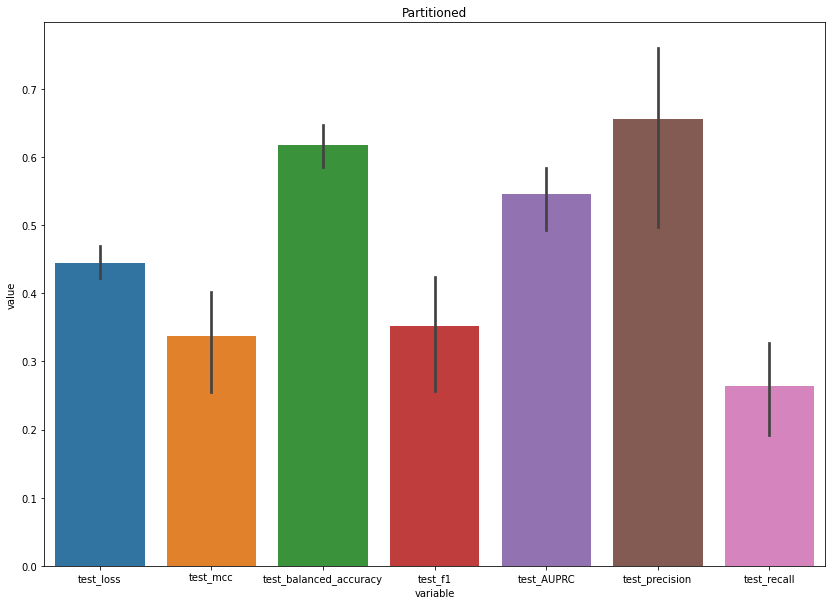

In [19]:
fig, ax = plt.subplots(figsize=(14,10))
sns.barplot(data=metrics_long_table, x="variable", y="value", ax=ax)
ax.set_title("Partitioned")
plt.show()